# Practice session 1: sections 00, 01, 02

# Background

## Ideal and nonideal gas laws

The ideal gas law is given by

$$pV=nRT$$

where p is the absolute pressure, V is the volume, n is the number of moles, R is the universal gas constant, and T is the absolute temperature.

This is a good approximation for most uses, but it is a simplification of reality. A more accurate description is given by the _van der Waals equation_:

$$\left(p + \frac{a}{v^2}\right) (v -b) = RT$$

where a and b are empirical values for each particular gas, and $v$ is the molal volume $v = V/n$

# Problem

## Background

![Cell Incubator](https://media.biocompare.com/m/37/product/5754312-400x300.jpg)

You are designing the containment system for the gases used in a cell incubator. Cell incubators need to regulate both oxygen and carbon dioxide in order to emulate the hypoxic conditions found inside organisms and therefore require a supply for both.

In order to do that, you need to accurately estimate the molal volume of both oxygen and carbon dioxide. We will also compare how well the ideal gas law describes each gas at the presures and temperatures of interest.

Pressures: 1, 10, 100 atm

Temperatures: 273, 300, 350 K.



## Data

$R = 0.082054 \frac{L\ atm}{K\ mol}$

Carbon dioxide: $a=3.592$, $b=0.04267$.

Oxygen: $a=1.360$, $b=0.03183$

## Tasks

* Use the Newton-Raphson function you coded in class to estimate the molal volume at the interesting temperatures and pressures with a $\epsilon_s$ of $10^{-8}$ for both oxigen and carbon dioxide. 

* Compare them to the values obtained from the ideal gas law.

* Plot the relative deviations that the ideal gas law incurs for both carbon dioxide and oxygen, for each of the temperatures and pressures.

## Solution

First, we need the `newton-raphson` function from class:

In [1]:
def newton_raphson(f, fprime, x0=1, es=0.0005, max_iterations=100):
    
    ea=1
    iteration=0
    
    while abs(ea) > es and iteration < max_iterations:
        x1 = x0 - f(x0) / fprime(x0)
        ea = (x1 - x0) / x1
        x0 = x1
        iteration += 1
    
    return x0

For it, we need an $f(x)$ and an $f'(x)$. The function we want to find the root for is:

$$f(v) = \left(p + \frac{a}{v^2}\right) (v -b) -RT$$

and its first derivative is:

$$f'(v) = -av^{-2} +2bv^{-3} + p$$

The roots we find will be the values of $v$ that satisfy the van der Waals equation.

Now we just have to code the functions:

In [2]:
def f(v, p=1, t=300, a=1.360, b=0.03183):
    R = 0.082054
    return (p + a / v ** 2) * (v - b) - R * t
    
def fprime(v, p=1, t=300, a=1.360, b=0.03183):
    return - a * v**-2 + 2*b*v**-3 + p

`newton_raphson()` takes an f and an fprime that in turn take a single parameter, $v$. In order to fix the constants for each gas and the temperature and pressure values, we could bind them in named functions like these:

In [3]:
def f_withdifferentvalues(v):
    return  f(v, 10, 273, 1.36, 0.03183)

def fprimewith_different_values(v):
    return fprime(v, 10, 273, 1.36, 0.03183)

newton_raphson(f_withdifferentvalues, fprimewith_different_values)

2.211286820036953

But it would get very laborious. It's a lot better to do this with anonymous functions.

In [4]:
temps = [273, 300, 350]
presssures = [1, 10, 100]

for temp in temps:
    for press in presssures:
        newton_raphson(lambda v: f(v, press, temp, 1.36, 0.03183), 
                       lambda v: fprime(v, press, temp, 1.36, 0.03183))

There are a number of ways to store the results, but one could be a 3-dimensional array, in which we store the results for each gas, temperature, and pressure:

In [5]:
import numpy as np

temperatures = [273, 300, 350]
pressures = [1, 10, 100]
# a and b for oxygen and co2:
gasses = [[1.36, 0.03183],[3.592 , 0.04267]]
R = 0.082054

# gasses, temps, pressures
real_gasses = np.zeros((2,3,3))
ideal_gas = np.zeros((3,3))

# enumerate is useful to get both values and indices at
# the same time. We unpack them in the loop declaration.
for i, (a_gas, b_gas) in enumerate(gasses):
    for j, temp in enumerate(temperatures):
        for k, press in enumerate(pressures):
            # Calculate v for a set of conditions
            this_result = newton_raphson(lambda v: f(v, press, temp, a_gas, b_gas), 
                                         lambda v: fprime(v, press, temp, a_gas, b_gas))
            
            real_gasses[i,j,k] = this_result
            # By placing this here, we are calculating twice the
            # values for the ideal gas, but in this case it isn't
            # very costly so we'll do it here for simplicity.
            ideal_gas[j, k] = R * temp / press

In [6]:
# values for oxygen and co2
real_gasses

array([[[2.23718679e+01, 2.21128682e+00, 1.98252106e-01],
        [2.45928008e+01, 2.43840385e+00, 2.26356850e-01],
        [2.87034014e+01, 2.85664212e+00, 2.75335051e-01]],

       [[2.22825180e+01, 2.11644758e+00, 1.49950404e-03],
        [2.45125881e+01, 2.35449559e+00, 6.41834573e-01],
        [2.86363218e+01, 2.78767962e+00, 4.70788573e-02]]])

In [7]:
ideal_gas

array([[22.400742  ,  2.2400742 ,  0.22400742],
       [24.6162    ,  2.46162   ,  0.246162  ],
       [28.7189    ,  2.87189   ,  0.287189  ]])

Now we are almost ready to plot! A nice advantage of saving the results in array form is that we can easily operate with them vectorially:

In [8]:
deviations = np.abs(real_gasses - ideal_gas) / ideal_gas
deviations

array([[[1.28898148e-03, 1.28510832e-02, 1.14975274e-01],
        [9.50559462e-04, 9.43124981e-03, 8.04557558e-02],
        [5.39665583e-04, 5.30935535e-03, 4.12757770e-02]],

       [[5.27768120e-03, 5.51886291e-02, 9.93306007e-01],
        [4.20909398e-03, 4.35178498e-02, 1.60736658e+00],
        [2.87539580e-03, 2.93222854e-02, 8.36070124e-01]]])

If we give `plt.plot()` a two-dimensional array of (m, n) shape, it will draw n lines with m points each. We can use this to very quickly plot: 

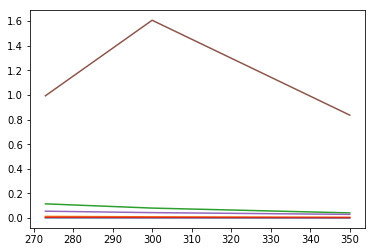

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

for gas in [0,1]:
    plt.plot(temps, deviations[gas, :,:])
    

As you can see, most of the time the ideal gas law is a good approximation to the behavior of real gasses, but sometimes it's not.

That line far above all others corresponds to high pressures in $CO_2$.

If you look again at the van der Waals equation, you will notice that it approximates the ideal gas law as a and b tend to zero, and that the differences will be bigger with bigger pressures and the bigger a and b are:

$$\left(p + \frac{a}{v^2}\right) (v -b) = RT$$
